In [1]:
import sys
sys.path.append('..')

In [2]:
from pathlib import Path
from matplotlib import pyplot as plt
from Hamiltonians import Kitaev
from Utils import draw_kitaev_honeycomb
import netket as nk

In [3]:
image_path = Path('./ThesisGraphics')

In [32]:
kitaev = nk.graph.KitaevHoneycomb(extent=[2, 2], pbc=True)
graph = nk.graph.KitaevHoneycomb(extent=[3, 3], pbc=False)
hilbert = nk.hilbert.Spin(s=1/2, N=kitaev.n_nodes)
hamiltonian = Kitaev(hilbert=hilbert, graph=kitaev, J=(0.45, 0.45, 0.1))

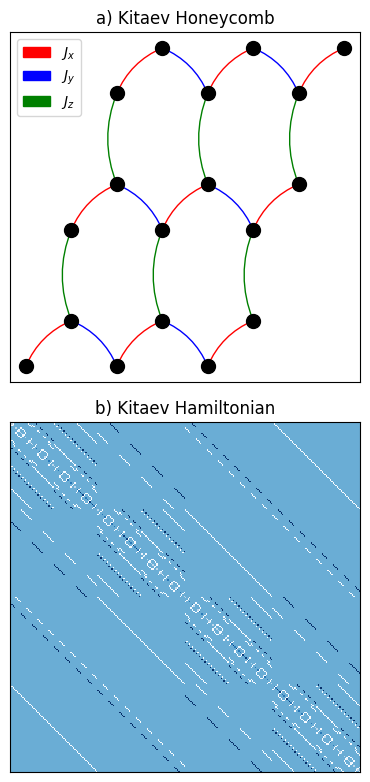

In [38]:
figure, axes = plt.subplots(2, 1, layout='constrained', figsize=(6, 10))
draw_kitaev_honeycomb(graph, ax=axes[0], node_color='black', font_size=1, node_size=100)
axes[1].imshow(hamiltonian.to_dense(), cmap='Blues', interpolation='nearest')
axes[1].set(xticks=[], yticks=[])
pos1 = axes[0].get_position()
pos2 = axes[1].get_position()
common_height = min(pos1.height, pos2.height)
common_width = min(pos1.width, pos2.width)
axes[0].set_position([pos1.x0, pos1.y0, common_width, common_height])
axes[1].set_position([pos1.x0, pos2.y0+0.03, common_width, common_height])
axes[0].set(title='a) Kitaev Honeycomb')
axes[1].set(title='b) Kitaev Hamiltonian')
figure.savefig(image_path / f'KitaevHoneycomb.png')

<Axes: >

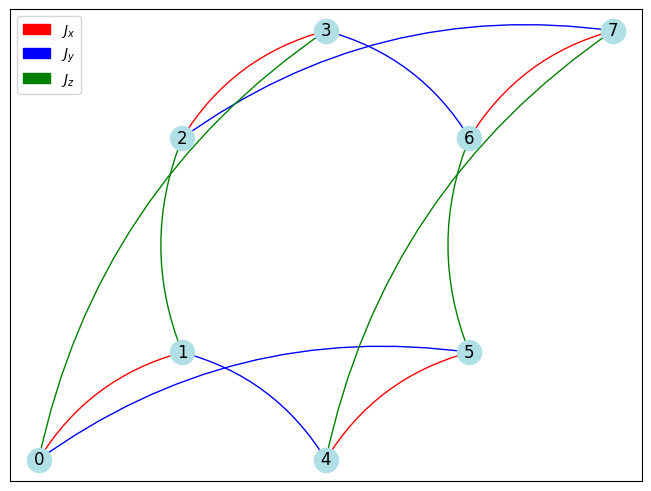

In [41]:
kitaev = nk.graph.KitaevHoneycomb(extent=[2, 2], pbc=True)
draw_kitaev_honeycomb(kitaev)

In [45]:
dict(zip(kitaev.edges(), kitaev.edge_colors))

{(0, 1): 0,
 (2, 3): 0,
 (4, 5): 0,
 (6, 7): 0,
 (0, 5): 1,
 (2, 7): 1,
 (1, 4): 1,
 (3, 6): 1,
 (0, 3): 2,
 (1, 2): 2,
 (4, 7): 2,
 (5, 6): 2}

In [50]:
import numpy as np

# Define the Hamiltonian matrix with specific J_x, J_y, J_z values
J_x = 1
J_y = 1
J_z = 1

H_kitaev = (1j / 2) * np.array([
    [0, J_x, 0, J_z, 0, J_y, 0, 0],
    [-J_x, 0, J_z, 0, J_y, 0, 0, 0],
    [0, -J_z, 0, J_x, 0, 0, 0, J_y],
    [-J_z, 0, -J_x, 0, 0, 0, J_y, 0],
    [0, -J_y, 0, 0, 0, J_x, 0, J_z],
    [-J_y, 0, 0, 0, -J_x, 0, J_z, 0],
    [0, 0, 0, -J_y, 0, -J_z, 0, J_x],
    [0, 0, -J_y, 0, -J_z, 0, -J_x, 0]
])

# Diagonalize the matrix
eigenvalues, eigenvectors = np.linalg.eigh(H_kitaev)

# Ground state corresponds to the eigenvector of the smallest eigenvalue
ground_state_wavefunction = eigenvectors[:, np.argmin(eigenvalues)]

eigenvalues, ground_state_wavefunction


(array([-1.11803399, -1.11803399, -0.5       , -0.5       ,  0.5       ,
         0.5       ,  1.11803399,  1.11803399]),
 array([-0.01673505+0.j        , -0.31605059+0.30856645j,
        -0.3533553 -0.3533553j ,  0.15802529-0.17299358j,
        -0.3533553 -0.3533553j ,  0.15802529-0.17299358j,
         0.01673505+0.j        ,  0.31605059-0.30856645j]))